In [1]:
# %load base.py
# 기본 패키지 불러오기
import numpy as np
import pandas as pd
import warnings
import mglearn
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
%matplotlib inline

# jtplot style 설정
jtplot.style(theme='gruvboxd', grid=False)

# matplotlib 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

# -부호 깨지지 않게 하기
plt.rcParams['axes.unicode_minus'] = False

# 경고 무시
warnings.filterwarnings("ignore")

C:\Users\Administrator\.conda\envs\multicampus\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\Administrator\.conda\envs\multicampus\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# 문자열 데이터 타입
1. 범주형 데이터 : 고정된 목록으로 구성 (ex. 노랑, 빨강, 파랑 등)  
2. 범주에 의미를 연결시킬 수 있는 임의의 문자열 : 범주로 변경 가능 (ex. 녹색과 빨강 줄무늬)  
3. 구조 (ex. 전화번호, 이름, 날짜)  
4. 텍스트 데이터

# 예제 애플리케이션: 영화 리뷰 감성 분석

In [11]:
from sklearn.datasets import load_files

reviews_train = load_files('./aclImdb/train/')
text_train, y_train = reviews_train.data, reviews_train.target

print('text_train의 타입:', type(text_train))
print('text_train의 길이:', len(text_train))
print('text_train[6]:\n', text_train[6])

text_train의 타입: <class 'list'>
text_train의 길이: 25000
text_train[6]:
 b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [12]:
text_train = [doc.replace(b"<br />",b" ") for doc in text_train]

In [5]:
print('클래스별 샘플 수 (훈련 데이터):', np.bincount(y_train))

클래스별 샘플 수 (훈련 데이터): [12500 12500]


In [13]:
reviews_test = load_files('./aclImdb/test/')
text_test, y_test = reviews_test.data, reviews_test.target
print('테스트 데이터의 문서 수:', len(text_test))
print('클래스별 샘플 수 (테스트 데이터):', np.bincount(y_test))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

테스트 데이터의 문서 수: 25000
클래스별 샘플 수 (테스트 데이터): [12500 12500]


# 텍스트 데이터를 BOW로 표현하기
1. 토큰화 : 각 문서를 문서에 포함된 단어(토큰)로 나눕니다. 예를 들어 공백이나 구두점 등을 기준으로 분리합니다.
2. 어휘 사전 구축 : 모든 문서에 나타난 모든 단어의 어휘를 모으고 번호를 매갭니다(알파벳 순서).
3. 인코딩 : 어휘 사전의 단어가 문서마다 몇 번이나 나타나는지를 헤아립니다.

## 샘플 데이터에 BOW 적용하기

In [7]:
bards_word = ['The fool doth think he is wise,',
             'but the wise man knows himself to be a fool']

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_word)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [9]:
print('어휘 사전의 크기:', len(vect.vocabulary_))
print('어휘 사전의 내용:\n', vect.vocabulary_)

어휘 사전의 크기: 13
어휘 사전의 내용:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [10]:
bag_of_words = vect.transform(bards_word)
print('BOW:', repr(bag_of_words))

BOW: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [11]:
print('BOW의 밀집 표현:\n', bag_of_words.toarray())

BOW의 밀집 표현:
 [[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


## 영화 리뷰에 대한 BOW

In [12]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n", repr(X_train))

X_train:
 <25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [13]:
feature_names = vect.get_feature_names()
print('특성 개수:', len(feature_names))
print('처음 20개 특성:\n', feature_names[:20])
print('20010에서 20030까지 특성:\n', feature_names[20010:20030])
print('매 2000번째 특성:\n', feature_names[::2000])

특성 개수: 74849
처음 20개 특성:
 ['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
20010에서 20030까지 특성:
 ['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']
매 2000번째 특성:
 ['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print('교차 검증 평균 점수: {:.2f}'.format(np.mean(scores)))

교차 검증 평균 점수: 0.88


In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print('최상의 교차 검증 점수: {:.2f}'.format(grid.best_score_))
print('최적의 매개변수:', grid.best_params_)

최상의 교차 검증 점수: 0.89
최적의 매개변수: {'C': 0.1}


In [16]:
X_test = vect.transform(text_test)
print('테스트 점수: {:.2f}'.format(grid.score(X_test, y_test)))

테스트 점수: 0.88


In [17]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print('min_df로 제한한 X_train:', repr(X_train))

min_df로 제한한 X_train: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [18]:
feature_names = vect.get_feature_names()

print('처음 50개 특성:\n', feature_names[:50])
print('20010에서 20030까지 특성:\n', feature_names[20010:20030])
print('매 700번째 특성:\n', feature_names[::700])

처음 50개 특성:
 ['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']
20010에서 20030까지 특성:
 ['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']
매 700번째 특성:
 ['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest', 'hauser', 'hungary', 'insinuate', 'juggle', 'leering', 'maelstrom', 'messiah', 'music', 'occasional', 'parking', 'pleasantville', 'pronunciation', 'recipient', '

In [19]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print('최적의 교차 검증 점수: {:.2f}'.format(grid.best_score_))

최적의 교차 검증 점수: 0.89


# 불용어

In [21]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print('불용어 개수:', len(ENGLISH_STOP_WORDS))
print('매 10번째 불용어:\n', list(ENGLISH_STOP_WORDS)[::10])

불용어 개수: 318
매 10번째 불용어:
 ['am', 'above', 'when', 'somehow', 'ie', 'further', 'had', 'over', 'will', 'throughout', 'your', 'as', 'everyone', 'empty', 'here', 'otherwise', 'again', 'hence', 'each', 'several', 'top', 'nor', 'perhaps', 'herein', 'across', 'due', 'have', 'then', 'whole', 'hasnt', 'fill', 'between']


In [22]:
vect = CountVectorizer(min_df=5, stop_words='english').fit(text_train)
X_train = vect.transform(text_train)
print('불용어가 제거된 X_train:\n', repr(X_train))

불용어가 제거된 X_train:
 <25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [23]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print('최상의 교차 검증 점수: {:.2f}'.format(grid.best_score_))

최상의 교차 검증 점수: 0.88


# tf-idf로 데이터 스케일 변경하기

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print('최상의 교차 검증 점수: {:.2f}'.format(grid.best_score_))

최상의 교차 검증 점수: 0.89


In [27]:
vectorizer = grid.best_estimator_.named_steps['tfidfvectorizer']
X_train = vectorizer.transform(text_train)
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
feature_names = np.array(vectorizer.get_feature_names())

print('가장 낮은 tfidf를 가진 특성:\n', feature_names[sorted_by_tfidf[:20]])
print('가장 높은 tfidf를 가진 특성:\n', feature_names[sorted_by_tfidf[-20:]])

가장 낮은 tfidf를 가진 특성:
 ['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
가장 높은 tfidf를 가진 특성:
 ['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


In [28]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print('가장 낮은 idf를 가진 특성:\n', feature_names[sorted_by_idf[:100]])

가장 낮은 idf를 가진 특성:
 ['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


# 모델 계수 조사

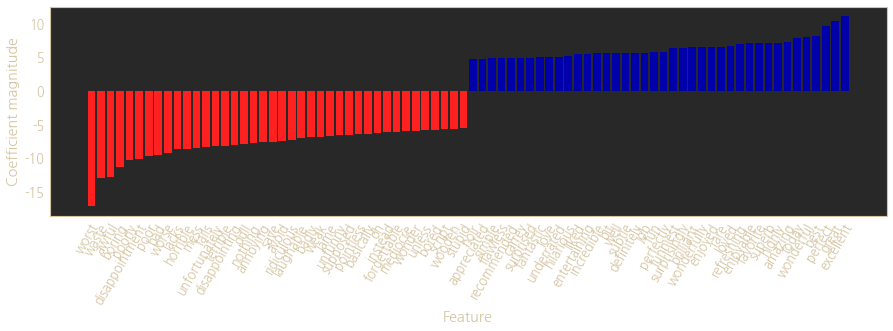

In [29]:
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps['logisticregression'].coef_[0], feature_names, n_top_features=40)

# 여러 단어로 만든 BOW(n-그램)

In [30]:
print('bards_words:\n', bards_word)

bards_words:
 ['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


In [32]:
cv = CountVectorizer(ngram_range=(1,1)).fit(bards_word)
print('어휘 사전 크기:', len(cv.vocabulary_))
print('어휘 사전:\n', cv.get_feature_names())

어휘 사전 크기: 13
어휘 사전:
 ['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


In [33]:
cv = CountVectorizer(ngram_range=(2,2)).fit(bards_word)
print('어휘 사전 크기:', len(cv.vocabulary_))
print('어휘 사전:\n', cv.get_feature_names())

어휘 사전 크기: 14
어휘 사전:
 ['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


In [34]:
print('변환된 데이터 (밀집 배열):\n', cv.transform(bards_word).toarray())

변환된 데이터 (밀집 배열):
 [[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [35]:
cv = CountVectorizer(ngram_range=(1,3)).fit(bards_word)
print('어휘 사전 크기:', len(cv.vocabulary_))
print('어휘 사전:\n', cv.get_feature_names())

어휘 사전 크기: 39
어휘 사전:
 ['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']


In [36]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
             'tfidfvectorizer__ngram_range': [(1,1), (1,2), (1,3)]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print('최상의 교차 검증 점수: {:.2f}'.format(grid.best_score_))
print('최적의 매개변수:\n', grid.best_params_)

최상의 교차 검증 점수: 0.91
최적의 매개변수:
 {'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


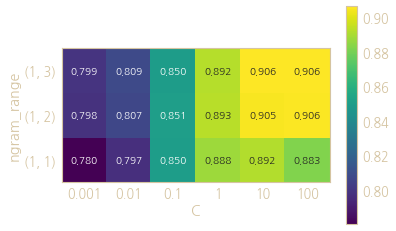

In [37]:
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
heatmap = mglearn.tools.heatmap(scores, xlabel='C', ylabel='ngram_range', cmap='viridis', fmt='%.3f',
                               xticklabels=param_grid['logisticregression__C'],
                               yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

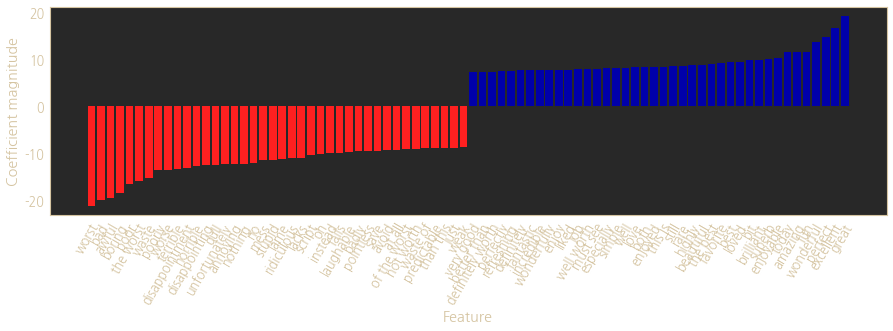

In [38]:
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef[0], feature_names, n_top_features=40)

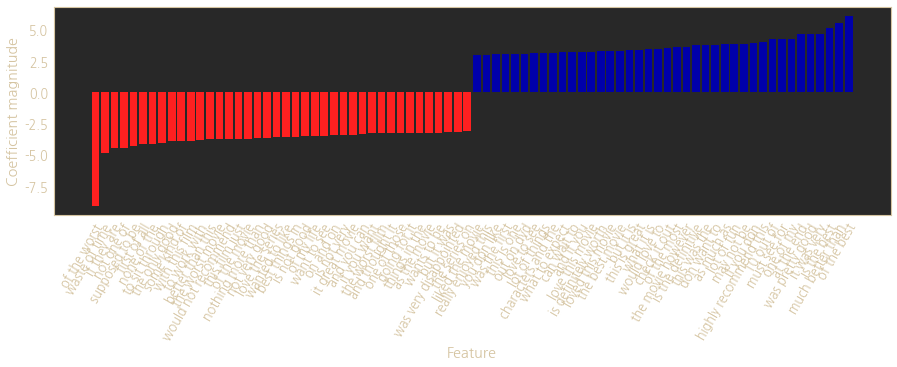

In [41]:
mask = np.array([len(feature.split(' ')) for feature in feature_names]) == 3
mglearn.tools.visualize_coefficients(coef.ravel()[mask],
                                   feature_names[mask], n_top_features=40)

# 고급 토큰화, 어간 추출, 표제어 추출

In [9]:
import spacy
import nltk

en_nlp = spacy.load('en')
stemmer = nltk.stem.PorterStemmer()

def compare_normalization(doc):
    doc_spacy = en_nlp(doc)
    print('표제어:')
    print([token.lemma_ for token in doc_spacy])
    print('어간:')
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

In [10]:
compare_normalization(u"Our meeting today was worse than yesterday, "
                      "I'm scared of meeting the clients tomorrow. ")

표제어:
['-PRON-', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', '-PRON-', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
어간:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


In [21]:
# spacy의 언어 모델을 로드합니다
en_nlp = spacy.load('en', disable=['parser', 'ner'])

# spacy 문서 처리 파이프라인을 사용해 자작 토큰 분할기를 만듭니다
# (우리만의 토큰 분할기를 사용합니다)
def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]

# 자작 토큰 분할기를 사용해 CountVectorizer 객체를 만듭니다
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)

In [22]:
X_train_lemma = lemma_vect.fit_transform(text_train)
print('X_train_lemma.shape:', X_train_lemma.shape)

X_train_lemma.shape: (25000, 21821)


In [23]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print('X_train.shape', X_train.shape)

X_train.shape (25000, 27271)


In [24]:
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.99, train_size=0.01, random_state=0)
grid = GridSearchCV(LogisticRegression(), param_grid, cv=cv)

grid.fit(X_train, y_train)
print('최상의 교차 검증 점수 ', '(기본 CountVectorizer): {:.3f}'.format(grid.best_score_))

grid.fit(X_train_lemma, y_train)
print('최상의 교차 검증 점수', '(표제어): {:.3f}'.format(grid.best_score_))

최상의 교차 검증 점수  (기본 CountVectorizer): 0.721
최상의 교차 검증 점수 (표제어): 0.722


# KoNLPy를 사용한 영화 리뷰 분석

In [2]:
df_train = pd.read_csv('./naver/ratings_train.txt', delimiter='\t', keep_default_na=False)
df_train.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [3]:
text_train, y_train = df_train['document'].values, df_train['label'].values

In [4]:
df_test = pd.read_csv('./naver/ratings_test.txt', delimiter='\t', keep_default_na=False)
text_test = df_test['document'].values
y_test = df_test['label'].values

In [5]:
len(text_train), np.bincount(y_train)

(150000, array([75173, 74827], dtype=int64))

In [6]:
len(text_test), np.bincount(y_test)

(50000, array([24827, 25173], dtype=int64))

In [7]:
from konlpy.tag import Okt
okt_tag = Okt()

In [8]:
def okt_tokenizer(text):
    return okt_tag.morphs(text)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

okt_param_grid = {'tfidfvectorizer__min_df': [3,5,7],
                 'tfidfvectorizer__ngram_range': [(1,1), (1,2), (1,3)],
                 'logisticregression__C': [0.1, 1, 10]}
okt_pipe = make_pipeline(TfidfVectorizer(tokenizer=okt_tokenizer), LogisticRegression(solver='liblinear'))
okt_grid = GridSearchCV(okt_pipe, okt_param_grid, cv=3)

okt_grid.fit(text_train[0:1000], y_train[0:1000])
print('최상의 교차 검증 점수: {:.3f}'.format(okt_grid.best_score_))
print('최적의 교차 검증 매개변수:', okt_grid.best_params_)

최상의 교차 검증 점수: 0.704
최적의 교차 검증 매개변수: {'logisticregression__C': 1, 'tfidfvectorizer__min_df': 3, 'tfidfvectorizer__ngram_range': (1, 1)}


In [10]:
X_test_okt = okt_grid.best_estimator_.named_steps['tfidfvectorizer'].transform(text_test)
score = okt_grid.best_estimator_.named_steps['logisticregression'].score(X_test_okt, y_test)
print('테스트 세트 점수: {:.3f}'.format(score))

테스트 세트 점수: 0.705


# 토픽 모델링과 문서 군집화

## LDA(잠재 디리클레 할당)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

In [17]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, learning_method='batch', max_iter=25, random_state=0)
document_topics = lda.fit_transform(X)

In [18]:
print('lda.components_.shape:', lda.components_.shape)

lda.components_.shape: (10, 10000)


In [19]:
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())

In [21]:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                          sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
young         world         worst         series        saw           
family        us            comedy        episode       am            
real          our           thing         tv            thought       
performance   american      guy           episodes      years         
beautiful     documentary   re            shows         book          
work          history       stupid        season        watched       
each          new           actually      new           now           
both          own           nothing       television    dvd           
director      point         want          years         got           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
horr

In [22]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method='batch', max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [23]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 41, 45, 51, 53, 54, 63, 89, 97])

In [24]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
                          sorting=sorting, topics_per_chunk=5, n_words=20)

topic 7       topic 16      topic 24      topic 25      topic 28      
--------      --------      --------      --------      --------      
thriller      worst         german        car           beautiful     
suspense      awful         hitler        gets          young         
horror        boring        nazi          guy           old           
atmosphere    horrible      midnight      around        romantic      
mystery       stupid        joe           down          between       
house         thing         germany       kill          romance       
director      terrible      years         goes          wonderful     
quite         script        history       killed        heart         
bit           nothing       new           going         feel          
de            worse         modesty       house         year          
performances  waste         cowboy        away          each          
dark          pretty        jewish        head          french        
twist 

In [25]:
music = np.argsort(document_topics100[:, 45])[::-1]
for i in music[:10]:
    print(b'.'.join(text_train[i].split(b'.')[:2]) + b'.\n')

b'I love this movie and never get tired of watching. The music in it is great.\n'
b"I enjoyed Still Crazy more than any film I have seen in years. A successful band from the 70's decide to give it another try.\n"
b'Hollywood Hotel was the last movie musical that Busby Berkeley directed for Warner Bros. His directing style had changed or evolved to the point that this film does not contain his signature overhead shots or huge production numbers with thousands of extras.\n'
b"What happens to washed up rock-n-roll stars in the late 1990's? They launch a comeback / reunion tour. At least, that's what the members of Strange Fruit, a (fictional) 70's stadium rock group do.\n"
b'As a big-time Prince fan of the last three to four years, I really can\'t believe I\'ve only just got round to watching "Purple Rain". The brand new 2-disc anniversary Special Edition led me to buy it.\n'
b"This film is worth seeing alone for Jared Harris' outstanding portrayal of John Lennon. It doesn't matter that H

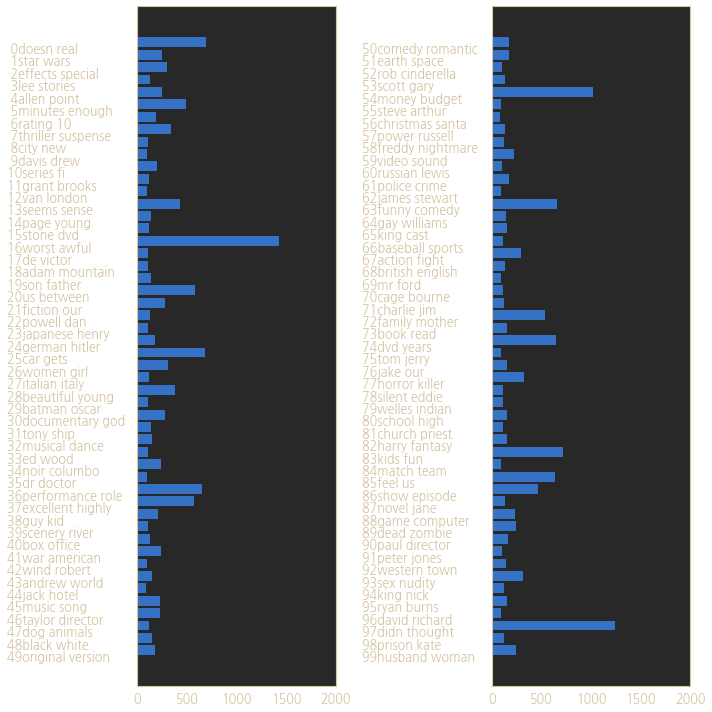

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
topic_names = ["{:>2}".format(i) + ' '.join(words) for i, words in enumerate(feature_names[sorting[:, :2]])]
for col in [0,1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha='left', va='top')
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()

# 요약 및 정리
1. BOW는 스팸이나 부정거래 탐지, 감성 분석에서 간단하고 강력한 해법이다.